# Otto商品分类——数据探索&特征工程

Otto数据集是著名电商Otto提供的一个多类商品分类问题，类别数=9. 每个样本有93维数值型特征（整数，可能表示某种事件发生的次数，已经进行过脱敏处理）。 
竞赛官网：https://www.kaggle.com/c/otto-group-product-classification-challenge/data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dpath = './data/'

train = pd.read_csv(dpath + 'Otto_train.csv')
train.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61878 entries, 0 to 61877
Data columns (total 95 columns):
id         61878 non-null int64
feat_1     61878 non-null int64
feat_2     61878 non-null int64
feat_3     61878 non-null int64
feat_4     61878 non-null int64
feat_5     61878 non-null int64
feat_6     61878 non-null int64
feat_7     61878 non-null int64
feat_8     61878 non-null int64
feat_9     61878 non-null int64
feat_10    61878 non-null int64
feat_11    61878 non-null int64
feat_12    61878 non-null int64
feat_13    61878 non-null int64
feat_14    61878 non-null int64
feat_15    61878 non-null int64
feat_16    61878 non-null int64
feat_17    61878 non-null int64
feat_18    61878 non-null int64
feat_19    61878 non-null int64
feat_20    61878 non-null int64
feat_21    61878 non-null int64
feat_22    61878 non-null int64
feat_23    61878 non-null int64
feat_24    61878 non-null int64
feat_25    61878 non-null int64
feat_26    61878 non-null int64
feat_27    61878 non-null i

In [4]:
train.describe()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
count,61878.000000,61878.00000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,...,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000
mean,30939.500000,0.38668,0.263066,0.901467,0.779081,0.071043,0.025696,0.193704,0.662433,1.011296,...,0.070752,0.532306,1.128576,0.393549,0.874915,0.457772,0.812421,0.264941,0.380119,0.126135
std,17862.784315,1.52533,1.252073,2.934818,2.788005,0.438902,0.215333,1.030102,2.255770,3.474822,...,1.151460,1.900438,2.681554,1.575455,2.115466,1.527385,4.597804,2.045646,0.982385,1.201720
min,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15470.250000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30939.500000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,46408.750000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,61878.000000,61.00000,51.000000,64.000000,70.000000,19.000000,10.000000,38.000000,76.000000,43.000000,...,76.000000,55.000000,65.000000,67.000000,30.000000,61.000000,130.000000,52.000000,19.000000,87.000000


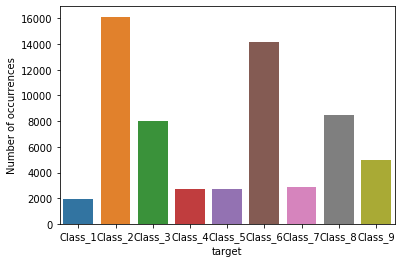

In [5]:
# 查看标签分布
sns.countplot(x='target', data=train)
plt.xlabel('target')
plt.ylabel('Number of occurrences')
plt.show()

各类样本不太均衡

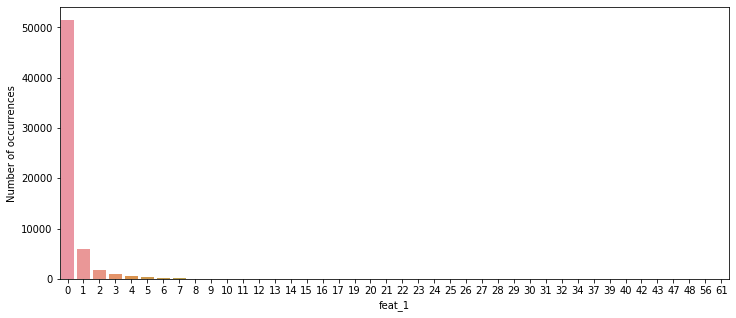

In [6]:
# 猜测不同特征的分布差不太多，所以只观察一个特征feat_1的分布
plt.figure(figsize=(12, 5))
sns.countplot(train['feat_1'])
plt.xlabel('feat_1')
plt.ylabel('Number of occurrences')
plt.show()

特征值大部分是0（90%的数据为0，特征稀疏），是长尾分布，可以考虑log(x+1)变换，减弱长尾中大特征值的影响。

看起来这些特征和计数有关系-->特征工程也可考虑TF-IDF

In [7]:
# 特征之间的相关系数
col_names = train.columns

feat_corr = train.corr().abs()
feat_corr

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
id,1.000000,0.070691,0.185463,0.138980,0.146020,0.030707,0.033410,0.136501,0.197418,0.156082,...,0.008192,0.084507,0.096484,0.097087,0.215878,0.111519,0.188895,0.139078,0.131737,0.047944
feat_1,0.070691,1.000000,0.031332,0.027807,0.027529,0.042973,0.043603,0.298952,0.056321,0.032285,...,0.049634,0.008739,0.107947,0.089374,0.020830,0.096851,0.010310,0.037264,0.054777,0.081783
feat_2,0.185463,0.031332,1.000000,0.082573,0.134987,0.020926,0.041343,0.222386,0.019815,0.025630,...,0.009845,0.006764,0.039090,0.047451,0.047035,0.105527,0.515022,0.026383,0.008219,0.054593
feat_3,0.138980,0.027807,0.082573,1.000000,0.583523,0.010880,0.004288,0.001294,0.053462,0.063551,...,0.011159,0.048626,0.096093,0.009838,0.082336,0.174781,0.015068,0.012417,0.066921,0.006814
feat_4,0.146020,0.027529,0.134987,0.583523,1.000000,0.017290,0.014059,0.014490,0.046184,0.046250,...,0.005684,0.033153,0.071029,0.005055,0.067484,0.183715,0.009454,0.010312,0.087631,0.015746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
feat_89,0.111519,0.096851,0.105527,0.174781,0.183715,0.119951,0.035042,0.063511,0.007974,0.019147,...,0.103643,0.053582,0.011822,0.066008,0.022552,1.000000,0.027764,0.015917,0.129622,0.030650
feat_90,0.188895,0.010310,0.515022,0.015068,0.009454,0.004842,0.054034,0.129578,0.026807,0.020698,...,0.006013,0.003931,0.019803,0.014696,0.031679,0.027764,1.000000,0.014812,0.035311,0.039864
feat_91,0.139078,0.037264,0.026383,0.012417,0.010312,0.012012,0.012465,0.068506,0.095990,0.014742,...,0.003444,0.023091,0.024005,0.028850,0.033653,0.015917,0.014812,1.000000,0.104226,0.000045
feat_92,0.131737,0.054777,0.008219,0.066921,0.087631,0.065331,0.015479,0.032261,0.013608,0.069707,...,0.048431,0.043484,0.049393,0.001424,0.070120,0.129622,0.035311,0.104226,1.000000,0.003653


In [8]:
threshold = 0.5
corr_list = []
size = feat_corr.shape[0]

for i in range(0, size):
    for j in range(i+1, size):
        if (feat_corr.iloc[i,j] >= threshold) and (feat_corr.iloc[i,j] < 1.0):
            corr_list.append([feat_corr.iloc[i,j], i, j])
            
s_corr_list = sorted(corr_list, key = lambda x: -(x[0]))
for v,i,j in s_corr_list:
    print('%s and %s = %.2f' % (col_names[i], col_names[j], v))

feat_39 and feat_45 = 0.82
feat_3 and feat_46 = 0.78
feat_15 and feat_72 = 0.76
feat_30 and feat_84 = 0.72
feat_9 and feat_64 = 0.70
feat_3 and feat_54 = 0.69
feat_29 and feat_77 = 0.61
feat_8 and feat_36 = 0.61
feat_11 and feat_27 = 0.60
feat_3 and feat_11 = 0.60
feat_3 and feat_4 = 0.58
feat_11 and feat_46 = 0.58
feat_61 and feat_80 = 0.58
feat_27 and feat_46 = 0.57
feat_46 and feat_54 = 0.57
feat_9 and feat_32 = 0.57
feat_7 and feat_78 = 0.57
feat_11 and feat_80 = 0.56
feat_14 and feat_25 = 0.56
feat_31 and feat_35 = 0.56
feat_52 and feat_74 = 0.55
feat_4 and feat_35 = 0.55
feat_3 and feat_28 = 0.55
feat_69 and feat_90 = 0.55
feat_11 and feat_61 = 0.54
feat_28 and feat_54 = 0.54
feat_4 and feat_54 = 0.53
feat_80 and feat_82 = 0.52
feat_2 and feat_90 = 0.52
feat_3 and feat_27 = 0.51
feat_46 and feat_61 = 0.50
feat_22 and feat_54 = 0.50
feat_27 and feat_61 = 0.50


特征之间相关性还好，考虑加正则

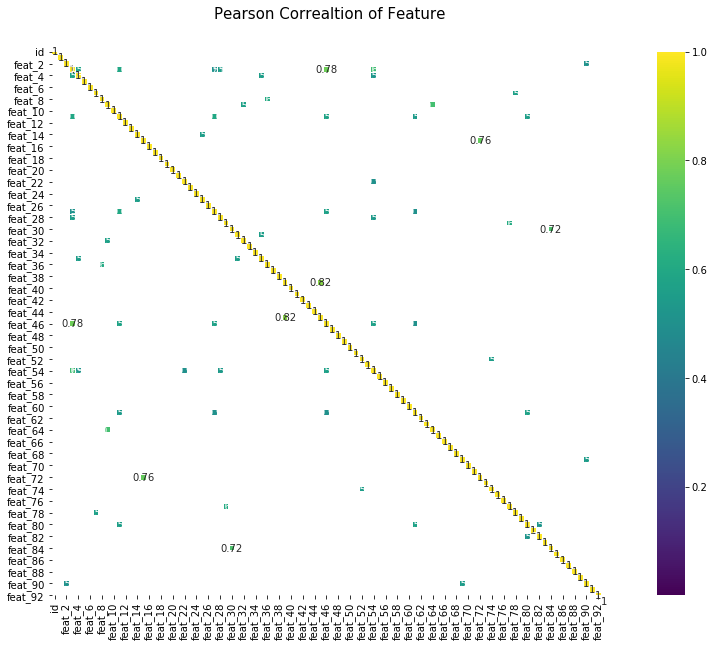

In [9]:
colormap = plt.cm.viridis
plt.figure(figsize=(18, 10))
plt.title('Pearson Correaltion of Feature', y=1.05, size=15)
sns.heatmap(feat_corr, linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', 
            annot=True, mask=feat_corr < 0.5)
plt.show()

## 特征工程

取对数log1p

tf-idf

In [10]:
train_id = train['id']
y_train = train['target']
X_train = train.drop(['id', 'target'], axis=1)
col_names_org = X_train.columns

### 1. feat编码：log(x+1)
原始特征feat_x看起来像计数特征，取log运算更接近人对数字的敏感度，更适合线性模型。同时也可以降低长尾分布中大数值的影响，减弱长尾分布的长尾性。

In [11]:
col_names_log = col_names_org + '_log'

X_train_log = np.log1p(X_train)
X_train_log = pd.DataFrame(data=X_train_log.values, columns=col_names_log)
X_train_log.head()

,feat_1_log,feat_2_log,feat_3_log,feat_4_log,feat_5_log,feat_6_log,feat_7_log,feat_8_log,feat_9_log,feat_10_log,...,feat_84_log,feat_85_log,feat_86_log,feat_87_log,feat_88_log,feat_89_log,feat_90_log,feat_91_log,feat_92_log,feat_93_log
0,0.693147,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.693147,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.693147,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.693147,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.693147,0.0,0.0,0.693147,1.94591,0.693147,1.791759,0.000000,0.0,0.693147,...,3.135494,0.000000,0.693147,1.098612,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.693147,0.000000,0.000000,0.0,0.0,0.693147,0.0,0.0,0.0


### 2. feat编码：TF-IDF
原始特征feat_x看起来像计数特征，类似文本分析中词频特征的处理，TF-IDF可以突出对特别类别有贡献的低频词。

这里原始特征已经是计数特征了，直接调用TfidfTransformer，将计数特征变成TF-IDF

如果输入是原始文本，需要将计数功能（TF）和IDF功能集中在一起，用TfidfVectorizer

In [12]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf = TfidfTransformer()
X_train_tfidf = tfidf.fit_transform(X_train).toarray()

col_names_tfidf = col_names_org + '_tfidf'

X_train_tfidf = pd.DataFrame(columns=col_names_tfidf, data=X_train_tfidf)
X_train_tfidf.head()

,feat_1_tfidf,feat_2_tfidf,feat_3_tfidf,feat_4_tfidf,feat_5_tfidf,feat_6_tfidf,feat_7_tfidf,feat_8_tfidf,feat_9_tfidf,feat_10_tfidf,...,feat_84_tfidf,feat_85_tfidf,feat_86_tfidf,feat_87_tfidf,feat_88_tfidf,feat_89_tfidf,feat_90_tfidf,feat_91_tfidf,feat_92_tfidf,feat_93_tfidf
0,0.080436,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.074055,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.227278,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.196169,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.011846,0.0,0.0,0.010756,0.103045,0.021145,0.073024,0.000000,0.0,0.013132,...,0.446712,0.000000,0.008051,0.022456,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.121616,0.000000,0.000000,0.0,0.0,0.142568,0.0,0.0,0.0


### 3.由于数据极度稀疏，数据缩放应采用MinMaxScaler，使得变换后的数据继续保持稀疏。

In [13]:
from sklearn.preprocessing import MinMaxScaler

mms_org = MinMaxScaler()
mms_log = MinMaxScaler()
mms_tfidf = MinMaxScaler()

feat_names_org = X_train.columns
feat_names_log = X_train_log.columns
feat_names_tfidf = X_train_tfidf.columns

X_train = mms_org.fit_transform(X_train)
X_train_log = mms_log.fit_transform(X_train_log)
X_train_tfidf = mms_tfidf.fit_transform(X_train_tfidf)

In [18]:
train_org = pd.concat([train_id, pd.DataFrame(columns=feat_names_org, data=X_train), y_train], axis=1)
train_org.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,0.016393,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.018182,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,Class_1
1,2,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.013158,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,Class_1
2,3,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.013158,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,Class_1
3,4,0.016393,0.0,0.0,0.014286,0.315789,0.1,0.131579,0.000000,0.0,...,0.000000,0.015385,0.029851,0.0,0.0,0.000000,0.0,0.0,0.0,Class_1
4,5,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.018182,0.000000,0.000000,0.0,0.0,0.007692,0.0,0.0,0.0,Class_1


In [16]:
train_log = pd.concat([train_id, pd.DataFrame(columns=feat_names_log, data=X_train_log), y_train], axis=1)
train_log.head()

,id,feat_1_log,feat_2_log,feat_3_log,feat_4_log,feat_5_log,feat_6_log,feat_7_log,feat_8_log,feat_9_log,...,feat_85_log,feat_86_log,feat_87_log,feat_88_log,feat_89_log,feat_90_log,feat_91_log,feat_92_log,feat_93_log,target
0,1,0.167949,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.172195,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,Class_1
1,2,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.159571,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,Class_1
2,3,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.159571,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,Class_1
3,4,0.167949,0.0,0.0,0.162608,0.649561,0.289065,0.489076,0.000000,0.0,...,0.000000,0.165443,0.260365,0.0,0.0,0.000000,0.0,0.0,0.0,Class_1
4,5,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.172195,0.000000,0.000000,0.0,0.0,0.142178,0.0,0.0,0.0,Class_1


In [17]:
train_tfidf = pd.concat([train_id, pd.DataFrame(columns=feat_names_tfidf, data=X_train_tfidf), y_train], axis=1)
train_tfidf.head()

,id,feat_1_tfidf,feat_2_tfidf,feat_3_tfidf,feat_4_tfidf,feat_5_tfidf,feat_6_tfidf,feat_7_tfidf,feat_8_tfidf,feat_9_tfidf,...,feat_85_tfidf,feat_86_tfidf,feat_87_tfidf,feat_88_tfidf,feat_89_tfidf,feat_90_tfidf,feat_91_tfidf,feat_92_tfidf,feat_93_tfidf,target
0,1,0.081393,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.075886,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,Class_1
1,2,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.231403,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,Class_1
2,3,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.199730,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,Class_1
3,4,0.011987,0.0,0.0,0.011668,0.105971,0.021681,0.080435,0.000000,0.0,...,0.000000,0.008244,0.022456,0.0,0.0,0.000000,0.0,0.0,0.0,Class_1
4,5,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.124622,0.000000,0.000000,0.0,0.0,0.145988,0.0,0.0,0.0,Class_1


In [19]:
train_org.to_csv(dpath + 'Otto_FE_train_org.csv', index = False, header = True)
train_log.to_csv(dpath + 'Otto_FE_train_log.csv', index = False, header = True)
train_tfidf.to_csv(dpath + 'Otto_FE_train_tfidf.csv', index = False, header = True)

### 4.保存特征编码过程中用到的模型，用于后续对测试数据的特征编码

In [21]:
import pickle

pickle.dump(tfidf, open("tfidf.pkl", 'wb'))

pickle.dump(mms_org, open("MinMaxScaler_org.pkl", 'wb'))
pickle.dump(mms_log, open('MinMaxScaler_log.pkl', 'wb'))
pickle.dump(mms_tfidf, open('MinMaxScaler_tfidf.pkl', 'wb'))